In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow keras

['Looking_Forward' 'Reading' 'Writting' 'Turning_Around' 'Sleeping'
 'Raising_Hand']
['Reading' 'Writting' 'Sleeping' 'Looking_Forward' 'Turning_Around'
 'Raising_Hand']
Label Index Mapping:
Looking_Forward: 0
Raising_Hand: 1
Reading: 2
Sleeping: 3
Turning_Around: 4
Writting: 5
Epoch 1/100
850/850 [==============================] - 8s 6ms/step - loss: 0.2920 - accuracy: 0.9179 - val_loss: 2.4359 - val_accuracy: 0.5276
Epoch 2/100
850/850 [==============================] - 6s 7ms/step - loss: 0.0587 - accuracy: 0.9831 - val_loss: 1.2273 - val_accuracy: 0.7088
Epoch 3/100
850/850 [==============================] - 5s 6ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 1.3857 - val_accuracy: 0.7535
Epoch 4/100
850/850 [==============================] - 6s 7ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.8135 - val_accuracy: 0.8003
Epoch 5/100
850/850 [==============================] - 6s 7ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.7309 - val_accuracy: 0.8496
Epoch 

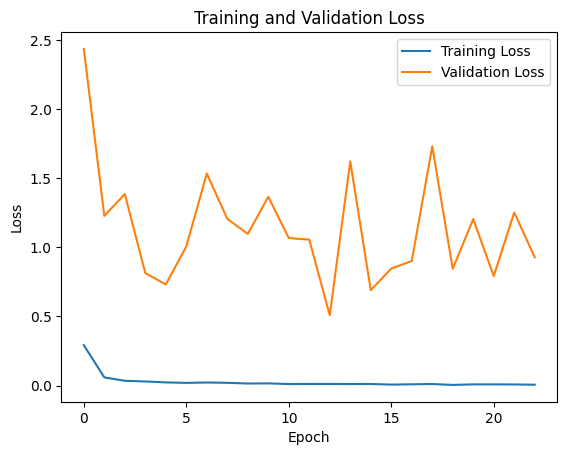

In [ ]:
from re import X
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam , SGD , AdamW
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation , Conv1D, MaxPooling1D, Flatten , GaussianNoise
from tensorflow.keras.regularizers import l2

# Load training and validation datasets
train_data = pd.read_csv("/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/train_data_remove_norm.csv")
val_data = pd.read_csv("/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/val_remove_norm.csv")

# print(train_data['pose_0_x'].dtype)

print(train_data['action_label'].unique())
print(val_data['action_label'].unique())
# print(val_data['pose_0_x'].dtype)
# # Preprocess the data
# X_train = train_data.drop(columns=["action_label"],).values.astype(np.float64)
# y_train = train_data["action_label"].values

# for i in range(1, 11):
#     columns_to_drop = [f'pose_{i}_x', f'pose_{i}_y']
#     train_data.drop(columns=columns_to_drop,inplace = True)

# for i in range(1, 11):
#     columns_to_drop = [f'pose_{i}_x', f'pose_{i}_y']
#     val_data.drop(columns=columns_to_drop,inplace = True)



# print("Training Data Types:")
# print(train_data.dtypes)

# print("\nValidation Data Types:")
# print(val_data.dtypes)


label_encoder = LabelEncoder()
train_data['action_label_encoded'] = label_encoder.fit_transform(train_data['action_label'])
val_data['action_label_encoded'] = label_encoder.transform(val_data['action_label'])

X_train = train_data.drop(columns=["action_label", "action_label_encoded"]).values.astype(np.float64)
y_train = train_data["action_label_encoded"].values

X_val = val_data.drop(columns=["action_label", "action_label_encoded"]).values.astype(np.float64)
y_val = val_data["action_label_encoded"].values

unique_labels = label_encoder.classes_
label_index_mapping = {label: index for index, label in enumerate(unique_labels)}
print("Label Index Mapping:")
for label, index in label_index_mapping.items():
    print(f"{label}: {index}")





# Define the model architecture
model = Sequential([

    # ------
    Dense(128, input_shape=(60,)),
    Activation('relu'),
    BatchNormalization(),
    Dense(64),
    Activation('relu'),
    BatchNormalization(),
    Dense(32),
    Activation('relu'),
    BatchNormalization(),
    Dense(16),
    Activation('relu'),
    BatchNormalization(),
    Dense(6, activation='softmax')  # Output layer with 6 neurons for 6 classes

])

# # Compile the model
model.compile(optimizer=AdamW(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training loop with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])



# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show plot
plt.show()

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/train_data_remove_norm.csv")
val_data = pd.read_csv("/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/val_remove_norm.csv")


train_label_counts = train_data['action_label'].value_counts()
print("Training Data - Number of images per label:")
print(train_label_counts)

# Count the number of images per label in validation data
val_label_counts = val_data['action_label'].value_counts()
print("\nValidation Data - Number of images per label:")
print(val_label_counts)

Training Data - Number of images per label:
action_label
Writting           12293
Sleeping            4311
Turning_Around      4223
Looking_Forward     2858
Raising_Hand        2307
Reading             1195
Name: count, dtype: int64

Validation Data - Number of images per label:
action_label
Writting           3030
Raising_Hand       1745
Sleeping           1527
Looking_Forward     779
Turning_Around      558
Reading             329
Name: count, dtype: int64


In [ ]:
model.save('/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/model_remove_norm_1st.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 18.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
import math

def calculate_distance(keypoint1, keypoint2):
    """Calculate Euclidean distance between two keypoints."""
    return math.sqrt((keypoint2[0] - keypoint1[0])**2 + (keypoint2[1] - keypoint1[1])**2)

def calculate_angle(keypoint1, keypoint2, reference_vector):
    """Calculate the angle between two vectors with respect to a reference vector."""
    vector1 = (keypoint1[0] - keypoint2[0], keypoint1[1] - keypoint2[1])
    vector2 = (keypoint2[0] - reference_vector[0], keypoint2[1] - reference_vector[1])

    dot_product = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    magnitude_product = math.sqrt((vector1[0]**2 + vector1[1]**2) * (vector2[0]**2 + vector2[1]**2))

    if magnitude_product == 0:
        return None

    cosine_angle = dot_product / magnitude_product
    angle_rad = math.acos(cosine_angle)
    angle_deg = math.degrees(angle_rad)

    return angle_deg

def get_midpoint(keypoint1, keypoint2):
    """Calculate the midpoint between two keypoints."""
    x_mid = (keypoint1[0] + keypoint2[0]) / 2
    y_mid = (keypoint1[1] + keypoint2[1]) / 2
    return x_mid, y_mid

def calculate_distances_and_angles(keypoints):
    """Calculate distances and angles between specified keypoints."""
    left_shoulder = keypoints[11]  # Keypoint index 11 is left shoulder

    left_elbow = keypoints[13] # Keypoint index 13 is left elbow


    left_wrist = keypoints[15] # Keypoint index 15 is left wrist
    right_shoulder = keypoints[12] # Keypoint index 12 is right shoulder
    right_elbow = keypoints[14]    # Keypoint index 14 is right elbow
    right_wrist = keypoints[16]    # Keypoint index 16 is right wrist
    nose = keypoints[0]            # Keypoint index 0 is nose
    neck = get_midpoint(left_shoulder, right_shoulder)  # Midpoint between left and right shoulders

    distances = {
        "left_shoulder_to_left_elbow": calculate_distance(left_shoulder, left_elbow),
        "left_elbow_to_left_wrist": calculate_distance(left_elbow, left_wrist),
        "right_shoulder_to_right_elbow": calculate_distance(right_shoulder, right_elbow),
        "right_elbow_to_right_wrist": calculate_distance(right_elbow, right_wrist),
        "nose_to_neck": calculate_distance(nose, neck)
    }

#     print(neck[0], neck[1] - 1)

    # angles = {
    #     "phi1": calculate_angle(nose, neck, (neck[0], neck[1] - 1)),  # Reference vector: straight up
    #     "phi2": calculate_angle(right_elbow, right_shoulder, (right_shoulder[0] + 1, right_shoulder[1])),  # Reference vector: pointing right
    #     "phi3": calculate_angle(right_wrist, right_elbow, (right_elbow[0], right_elbow[1] - 1)),  # Reference vector: straight up
    #     "phi4": calculate_angle(left_elbow, left_shoulder, (left_shoulder[0] - 1, left_shoulder[1])),  # Reference vector: pointing left
    #     "phi5": calculate_angle(left_wrist, left_elbow, (left_elbow[0], left_elbow[1] - 1))  # Reference vector: straight up
    # }

    angles = {
        "phi1": calculate_angle(nose, neck, (neck[0], neck[1] + 1)),  # Reference vector: perpendicular to the horizontal plane
        "phi2": calculate_angle(right_elbow, right_shoulder, (right_shoulder[0] + 1, right_shoulder[1])),  # Reference vector: pointing right
        "phi3": calculate_angle(right_wrist, right_elbow, (right_elbow[0], right_elbow[1] + 1)),  # Reference vector: horizontal
        "phi4": calculate_angle(left_elbow, left_shoulder, (left_shoulder[0] - 1, left_shoulder[1])),  # Reference vector: pointing left
        "phi5": calculate_angle(left_wrist, left_elbow, (left_elbow[0], left_elbow[1] + 1))  # Reference vector: horizontal
    }


    return distances, angles







In [ ]:
# def normalize_keypoints_fun(keypoints, image_width, image_height):
#     normalized_keypoints = []
#     for kp in keypoints:
#         x_norm = kp.x / image_width
#         y_norm = kp.y / image_height
#         normalized_keypoints.append((x_norm, y_norm))
#     return normalized_keypoints



import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose



model_path ='/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/model_remove_norm_1st.h5'


action_model = load_model(model_path)
# cap = cv2.VideoCapture('/content/drive/MyDrive/Mini project 1 /videos/sleeping.mp4')

# Initialize the person detection model (replace this with your model)
person_model = YOLO(r"yolov8n.pt")

# Initialize the pose estimation model
with mp_pose.Pose(static_image_mode=False,
                  model_complexity=2,
                  smooth_landmarks=True,
                  min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as pose:

    cap = cv2.VideoCapture('/content/drive/MyDrive/Mini project 1 /Movie on 13-04-24 at 4.40 PM.mov')

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        image = frame


        # Perform person detection
        detected_persons = person_model(frame)
    # For each detected person, perform pose estimation and action classification
        for r in detected_persons:
            boxes=r.boxes
            for box in boxes :
                # Extract ROI containing the person
                 if box.cls == 0:
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1,y1,x2,y2=int(x1), int(y1), int(x2), int(y2)
                    print(f'x1:{x1}, y1:{y1}, x2:{x2}, y2:{y2}')
                    width = x2 - x1
                    height = y2 - y1
                    roi = frame[int(y1):int(y2), int(x1):int(x2)]

                    # Perform pose estimation
                    results = pose.process(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                    if results.pose_landmarks is None:
                        continue
                    # # Print out the type and structure of keypoints
                    # print(type(keypoints))
                    # print(keypoints)
                    keypoints = results.pose_landmarks.landmark
                    if results.pose_landmarks is not None:
                        mp_drawing.draw_landmarks(frame[y1:y2, x1:x2], results.pose_landmarks, mp_pose.POSE_CONNECTIONS)


                    if keypoints is not None:
                        # Extract pose keypoints
                        # normalized_keypoints_t = normalize_keypoints_fun(keypoints[:25], width, height)


                        flattened_keypoints = [(kp.x, kp.y) for kp in keypoints[:25]]
                        distances, angles = calculate_distances_and_angles(flattened_keypoints)
                        sepearted_keypoints = [coord for kp in flattened_keypoints for coord in kp]
                        flattened_distances = list(distances.values())
                        flattened_angles = list(angles.values())

                        # flattened_keypoints = flattened_keypoints[0:2] + flattened_keypoints[22:]

                        data_row = sepearted_keypoints + flattened_distances + flattened_angles

                        print('original')
                        print(data_row)
                        data_row = np.array(data_row).reshape(1, -1)
                        print('after')
                        print(data_row)

                        predicted_action = action_model.predict(data_row)
                        print(predicted_action[0])
                        predicted_index = np.argmax(predicted_action[0])

                        # Overlay the predicted action label on the frame
                        cv2.putText(frame, str(predicted_index), (x1-20, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)

                        # cv2.putText(frame, predicted_action, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)

                    # Draw bounding box around the person
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 2)

            # Display the frame
            cv2_imshow(frame)

            # Check for 'q' key press to exit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:


import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

person_model = YOLO(r"yolov8n.pt")
labels = ['Looking_Forward', 'Raising_Hand', 'Reading', 'Sleeping', 'Turning_Around', 'Writting']

# model_path = '/content/drive/MyDrive/Mini project 1 /pose action/csv of modified dataset/model_modified_data_16_apri.h5'  # Update with the path to your model

model_path = '/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/model_remove_norm_1st.h5'

action_model = load_model(model_path)

# Open input video file
input_video_path = '/content/drive/MyDrive/Mini project 1 /videos/video_classroom_3.mp4'
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read the first frame to initialize variables
ret, frame = cap.read()
if not ret:
    print("Error: Unable to read the first frame.")
    exit()

# Initialize output video writer
output_video_path = '/content/drive/MyDrive/Mini project 1 /videos/video_classroom_3_OUTPUT_senior.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
output_video = cv2.VideoWriter(output_video_path, fourcc,24 , (frame.shape[1], frame.shape[0]))


with mp_pose.Pose(static_image_mode=False,
                  model_complexity=2,
                  # num_poses=100,
                  smooth_landmarks=True,
                  min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as pose:

        # Process each frame
        while cap.isOpened():
            # Perform person detection
            detected_persons = person_model(frame,stream= True)

            # For each detected person, perform pose estimation and action classification
            for r in detected_persons:
                boxes = r.boxes
                for box in boxes:
                    # Extract ROI containing the person
                    if box.cls == 0:
                        x1, y1, x2, y2 = box.xyxy[0]
                        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                        width = x2 - x1
                        height = y2 - y1
                        roi = frame[int(y1):int(y2), int(x1):int(x2)]

                        results = pose.process(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                        if results.pose_landmarks is None:
                            continue

                        # if results.pose_landmarks is not None:
                        #     mp_drawing.draw_landmarks(frame[y1:y2, x1:x2], results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                        # Extract keypoints and calculate features
                        keypoints = results.pose_landmarks.landmark
                        flattened_keypoints = [(kp.x, kp.y) for kp in keypoints[:25]]
                        distances, angles = calculate_distances_and_angles(flattened_keypoints)
                        sepearted_keypoints = [coord for kp in flattened_keypoints for coord in kp]
                        flattened_distances = list(distances.values())
                        flattened_angles = list(angles.values())


                        # flattened_keypoints = flattened_keypoints[0:2] + flattened_keypoints[22:]

                        data_row = sepearted_keypoints + flattened_distances + flattened_angles
                        data_row = np.array(data_row).reshape(1, -1)

                        # Predict action
                        predicted_action = action_model.predict(data_row)
                        predicted_index = np.argmax(predicted_action[0])

                        # Overlay the predicted action label and draw bounding box
                        cv2.putText(frame, labels[predicted_index], (x1 - 20, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 2)

            # Write annotated frame to output video
                output_video.write(frame)

            # Read the next frame
            ret, frame = cap.read()
            if not ret:
                break

# Release resources
cap.release()
output_video.release()
cv2.destroyAllWindows()


In [ ]:


import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

person_model = YOLO(r"yolov8n.pt")
labels = ['Looking_Forward', 'Raising_Hand', 'Reading', 'Sleeping', 'Turning_Around', 'Writting']

# model_path = '/content/drive/MyDrive/Mini project 1 /pose action/csv of modified dataset/model_modified_data_16_apri.h5'  # Update with the path to your model

model_path = '/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/model_remove_norm_1st.h5'

action_model = load_model(model_path)

# Open input video file
input_video_path = '/content/drive/MyDrive/Mini project 1 /videos/video_classroom_3.mp4'
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read the first frame to initialize variables
ret, frame = cap.read()
if not ret:
    print("Error: Unable to read the first frame.")
    exit()

# Initialize output video writer
output_video_path = '/content/drive/MyDrive/Mini project 1 /videos/video_classroom_3_OUTPUT_senior.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
output_video = cv2.VideoWriter(output_video_path, fourcc,24 , (frame.shape[1], frame.shape[0]))


with mp_pose.Pose(static_image_mode=False,
                  model_complexity=2,
                  # num_poses=100,
                  smooth_landmarks=True,
                  min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as pose:

        # Process each frame
while cap.isOpened():
    # Perform person detection
    detected_persons = person_model(frame,stream= True)

    # For each detected person, perform pose estimation and action classification
    for r in detected_persons:
        boxes = r.boxes
        for box in boxes:
            # Extract ROI containing the person
            if box.cls == 0:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                width = x2 - x1
                height = y2 - y1
                roi = frame[int(y1):int(y2), int(x1):int(x2)]

                pose = mp_pose.Pose(static_image_mode=False,
                                    model_complexity=2,
                                    smooth_landmarks=True,
                                    min_detection_confidence=0.5,
                                    min_tracking_confidence=0.5)

                results = pose.process(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
                if results.pose_landmarks is None:
                    continue

                # if results.pose_landmarks is not None:
                #     mp_drawing.draw_landmarks(frame[y1:y2, x1:x2], results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                # Extract keypoints and calculate features
                keypoints = results.pose_landmarks.landmark
                flattened_keypoints = [(kp.x, kp.y) for kp in keypoints[:25]]
                distances, angles = calculate_distances_and_angles(flattened_keypoints)
                sepearted_keypoints = [coord for kp in flattened_keypoints for coord in kp]
                flattened_distances = list(distances.values())
                flattened_angles = list(angles.values())
                pose.close()


                # flattened_keypoints = flattened_keypoints[0:2] + flattened_keypoints[22:]

                data_row = sepearted_keypoints + flattened_distances + flattened_angles
                data_row = np.array(data_row).reshape(1, -1)

                # Predict action
                predicted_action = action_model.predict(data_row)
                predicted_index = np.argmax(predicted_action[0])

                # Overlay the predicted action label and draw bounding box
                cv2.putText(frame, labels[predicted_index], (x1 - 20, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 2)

    # Write annotated frame to output video
        output_video.write(frame)

    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break

# Release resources
cap.release()
output_video.release()
cv2.destroyAllWindows()


# TESTING


In [ ]:
# Load test dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
test_data = pd.read_csv("/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/test_data_remove_norm.csv")

test_label_counts = test_data['action_label'].value_counts()
print("Training Data - Number of images per label:")
print(test_label_counts)


label_encoder = LabelEncoder()
test_data['action_label_encoded'] = label_encoder.fit_transform(test_data['action_label'])

# Preprocess the test data
X_test = test_data.drop(columns=["action_label", "action_label_encoded"]).values.astype(np.float64)

y_test = test_data["action_label_encoded"].values
print(test_data["action_label_encoded"].unique())
# Load the trained model
model_path = '/content/drive/MyDrive/Mini project 1 /pose action/csv of keypoints remove norm/model_remove_norm_1st.h5'  # Update this with the path to your pretrained model
loaded_model = tf.keras.models.load_model(model_path)

# # Evaluate the model on the test data
# test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)

# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test data
predictions = loaded_model.predict(X_test)

unique_labels = label_encoder.classes_

# Convert predictions to class labels
predicted_labels = [unique_labels[np.argmax(prediction)] for prediction in predictions]

# # Display some sample predictions
# for i in range(10):
#     print(f"Predicted: {predicted_labels[i]}, Actual: {unique_labels[y_test[i]]}")


Training Data - Number of images per label:
action_label
Writing            299
Raising_Hand       259
Reading            240
Turning_Around     226
Looking_Forward    218
Sleeping           119
Name: count, dtype: int64
[0 2 4 5 3 1]
43/43 [==============================] - 0s 2ms/step


43/43 [==============================] - 0s 2ms/step


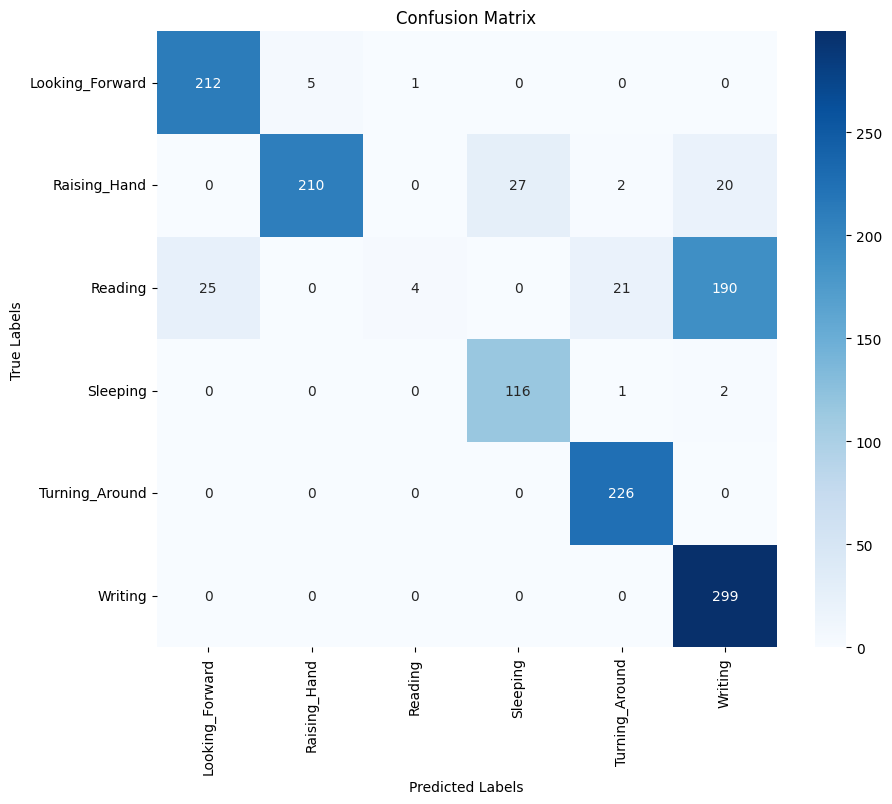

Classification Report:
                 precision    recall  f1-score   support

Looking_Forward       0.89      0.97      0.93       218
   Raising_Hand       0.98      0.81      0.89       259
        Reading       0.80      0.02      0.03       240
       Sleeping       0.81      0.97      0.89       119
 Turning_Around       0.90      1.00      0.95       226
        Writing       0.59      1.00      0.74       299

       accuracy                           0.78      1361
      macro avg       0.83      0.80      0.74      1361
   weighted avg       0.82      0.78      0.72      1361



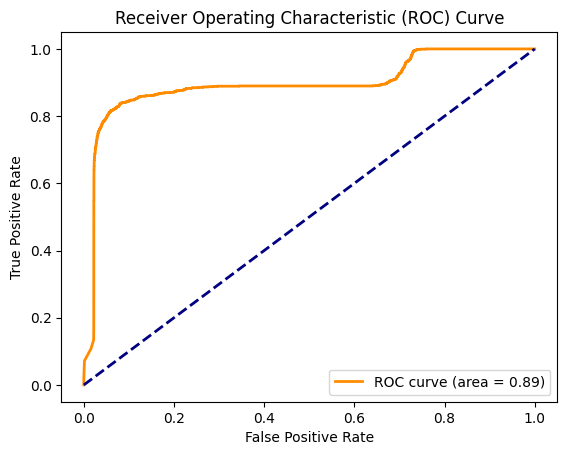

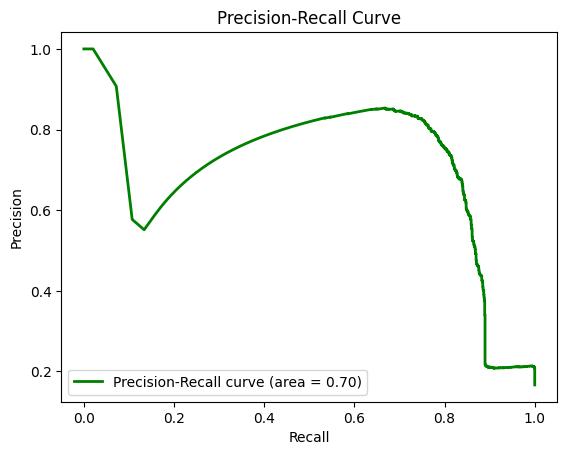

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, predicted_labels, target_names=unique_labels)
print("Classification Report:")
print(class_report)

# Compute ROC curve and ROC AUC
y_test_categorical = tf.keras.utils.to_categorical(y_test)
fpr, tpr, _ = roc_curve(y_test_categorical.ravel(), predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test_categorical.ravel(), predictions.ravel())
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

